In [15]:
#Python Data Science Handbook

In [7]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
X= np.arange(12).reshape((3,4))

In [9]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [11]:
row = np.array([0,1,2])
col = np.array([2,1,3])
X[row,col]

array([ 2,  5, 11])

In [17]:
X[row[:,np.newaxis],col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [21]:
#Sort along rows and columns
rng = np.random.default_rng(seed=135)
X = rng.integers(0,10,(4,6))
print(X)

[[4 5 8 2 2 9]
 [2 9 2 2 5 1]
 [6 9 6 5 0 8]
 [9 5 7 5 5 1]]


In [23]:
np.sort(X,axis=0)

array([[2, 5, 2, 2, 0, 1],
       [4, 5, 6, 2, 2, 1],
       [6, 9, 7, 5, 5, 8],
       [9, 9, 8, 5, 5, 9]], dtype=int64)

In [4]:
rng=np.random.RandomState(135)
df = pd.DataFrame({'key':['A','B','C','A','B','C'],'data1':range(6),'data2':rng.randint(0,10,6)},columns=['key','data1','data2'])

In [6]:
df

,key,data1,data2
0,A,0,5
1,B,1,8
2,C,2,6
3,A,3,9
4,B,4,7
5,C,5,3


In [8]:
#Aggregate example
df.groupby('key').aggregate(['min',np.median,max])

C:\Users\MarkM\AppData\Local\Temp\ipykernel_5744\1988691327.py:1: FutureWarning: The provided callable <function median at 0x0000025193FA9620> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('key').aggregate(['min',np.median,max])
C:\Users\MarkM\AppData\Local\Temp\ipykernel_5744\1988691327.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby('key').aggregate(['min',np.median,max])


data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     5    7.0   9
B       1    2.5   4     7    7.5   8
C       2    3.5   5     3    4.5   6

In [10]:
#Filter
def filter_func(x):
    return x['data2'].std()> 4

In [14]:
df.groupby('key').filter(filter_func)

,key,data1,data2


In [27]:
#Pivot tables
titanic = sns.load_dataset('titanic')

In [29]:
titanic.pivot_table('survived',index='sex',columns='class',aggfunc='mean')

C:\Users\MarkM\AppData\Local\Temp\ipykernel_5744\631544778.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived',index='sex',columns='class',aggfunc='mean')


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [16]:
#PLot example
x= np.linspace(0,10,1000)

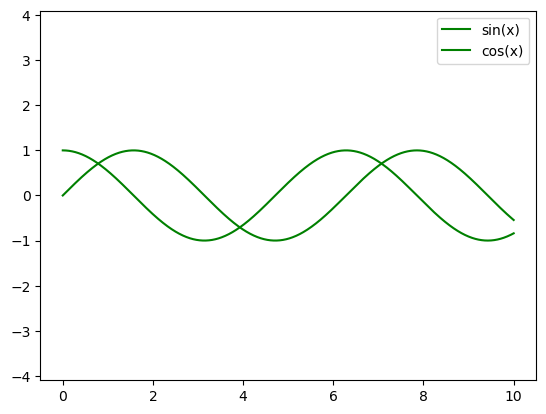

In [23]:
plt.plot(x,np.sin(x),'-g',label='sin(x)')
plt.plot(x,np.cos(x),'-g',label='cos(x)')
plt.axis('equal')
plt.legend()

In [31]:
#Scatterplot example
from sklearn.datasets import load_iris
iris=load_iris()
features=iris.data.T

Text(0, 0.5, 'sepal width (cm)')

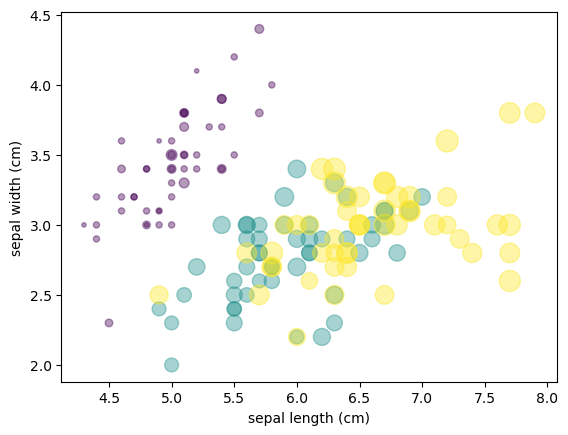

In [33]:
plt.scatter(features[0],features[1],alpha=0.4,s=100*features[3],c=iris.target,cmap='viridis') 
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

In [35]:
#Contour Plot
def f(x,y):
    return np.sin(x)**10 + np.cos(10 + y*x)*np.cos(x)

In [37]:
x=np.linspace(0,5,50)
y=np.linspace(0,5,40)

In [39]:
X,Y=np.meshgrid(x,y)
Z=f(X,Y)

C:\Users\MarkM\AppData\Local\Temp\ipykernel_5744\1150165552.py:1: UserWarning: The following kwargs were not used by contour: 'colours'
  plt.contour(X,Y,Z,colours='black')


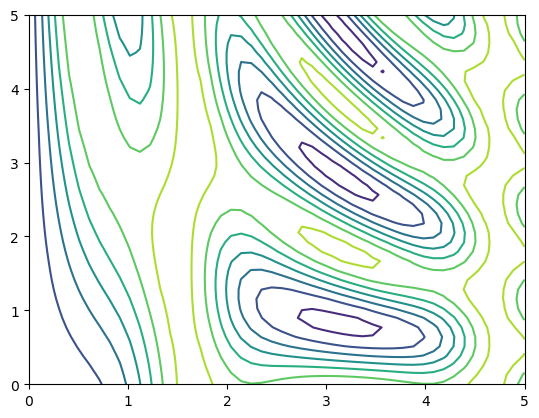

In [54]:
plt.contour(X,Y,Z,colours='black')

In [56]:
from sklearn.datasets import load_digits
digits= load_digits(n_class=6)

In [58]:
#Manifold Dimensionality Reduction & Visualisation
from sklearn.manifold import Isomap
iso= Isomap(n_components=2,n_neighbors=15)
projection= iso.fit_transform(digits.data)

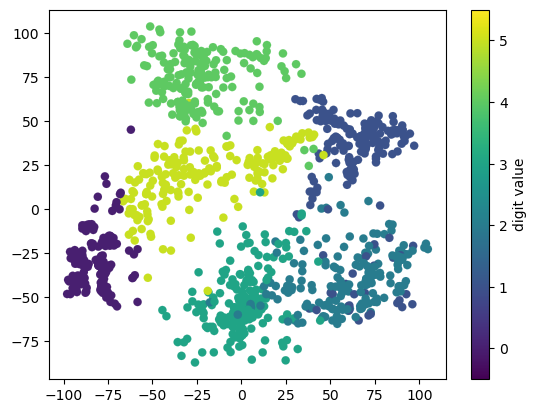

In [60]:
#plot the manifold projections
plt.scatter(projection[:,0],projection[:,1],lw=0.1,c=digits.target)
plt.colorbar(ticks=range(6),label='digit value')
plt.clim(-0.5,5.5)

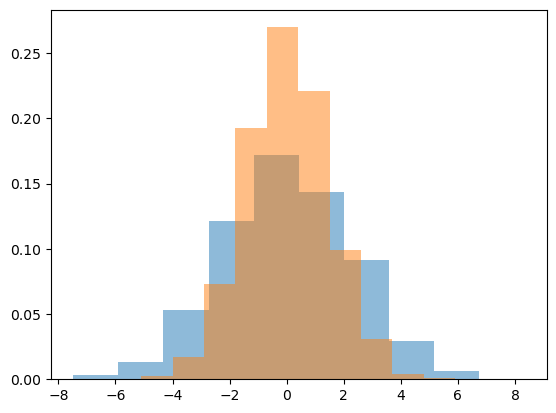

In [62]:
#Histograms,KDE and Densities
#Create sythetic data
data = np.random.multivariate_normal([0,0],[[5,2],[2,2]],size=2000)
data = pd.DataFrame(data,columns=['x','y'])
for col in 'xy':
    plt.hist(data[col],density=True,alpha=0.5)

C:\Users\MarkM\AppData\Local\Temp\ipykernel_5744\1607286097.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data,shade=True)


<Axes: ylabel='Density'>

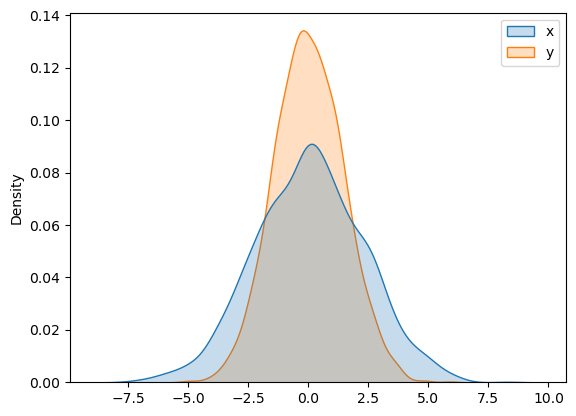

In [64]:
sns.kdeplot(data=data,shade=True)

<Axes: xlabel='x', ylabel='y'>

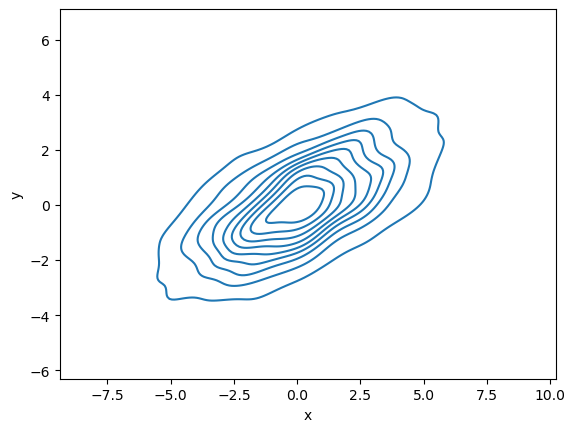

In [66]:
sns.kdeplot(data=data,x='x',y='y')

In [3]:
#Model Validation and Learning Curves
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2,**kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

In [5]:
#Generate sythentic data
def make_data(N,err=1.0,rseed=135):
    #randomly sample data
    rng = np.random.RandomState(rseed)
    X= rng.rand(N,1)**2
    y = 10 -1./(X.ravel() + 0.1)
    if err > 0:
        y += err*rng.randn(N)
    return X,y

In [7]:
X,y  = make_data(40)

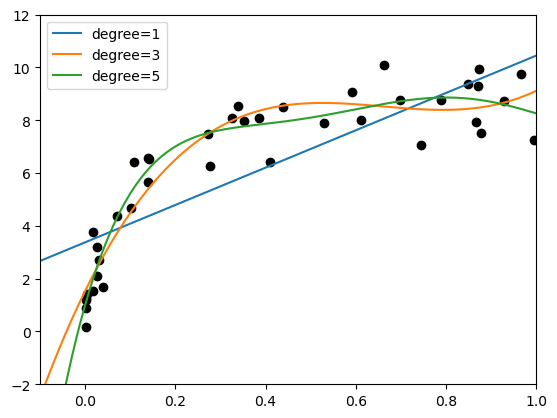

In [9]:
X_test = np.linspace(-0.1,1.1,500)[:,None]
plt.scatter(X.ravel(),y,color='black')
axis=plt.axis()
for degree in [1,3,5]:
    y_test = PolynomialRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(),y_test,label='degree={0}'.format(degree))
plt.xlim(-0.1,1.0)
plt.ylim(-2,12)
plt.legend(loc='best')

In [13]:
#Show validation curves
from sklearn.model_selection import validation_curve
degree= np.arange(0,21)
train_score, val_score = validation_curve(PolynomialRegression(),X,y,param_name='polynomialfeatures__degree',param_range=degree,cv=7)

Text(0, 0.5, 'score')

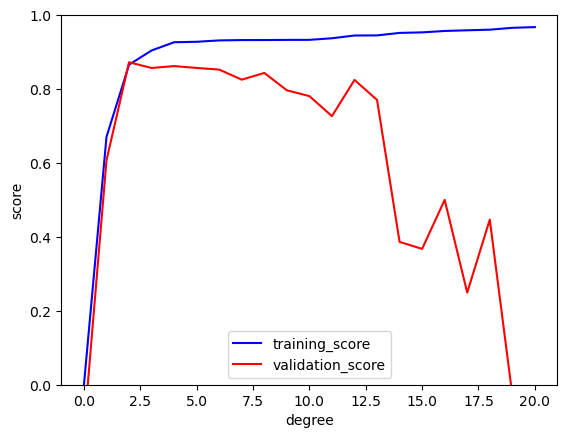

In [18]:
plt.plot(degree,np.median(train_score,1),color='blue',label='training_score')
plt.plot(degree,np.median(val_score,1),color='red',label='validation_score')
plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score')

(-0.04857567591221875,
 1.044182394481886,
 -0.3343473212358128,
 10.603720305075854)

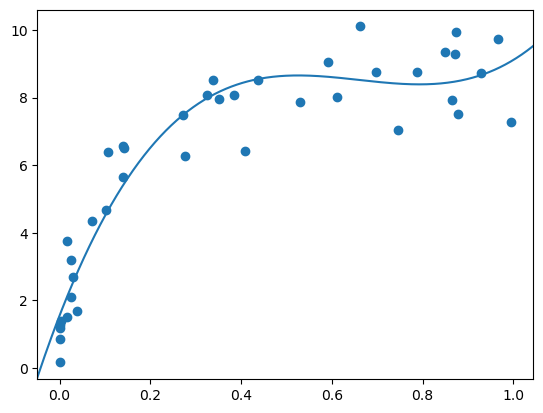

In [20]:
plt.scatter(X.ravel(),y)
lim = plt.axis()
y_test= PolynomialRegression(3).fit(X,y).predict(X_test)
plt.plot(X_test.ravel(),y_test)
plt.axis(lim)

In [22]:
X2,y2=make_data(200)

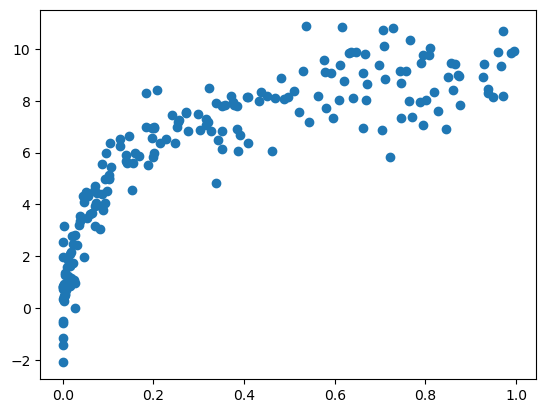

In [24]:
#Learning Curves
plt.scatter(X2.ravel(),y2)

Text(0, 0.5, 'score')

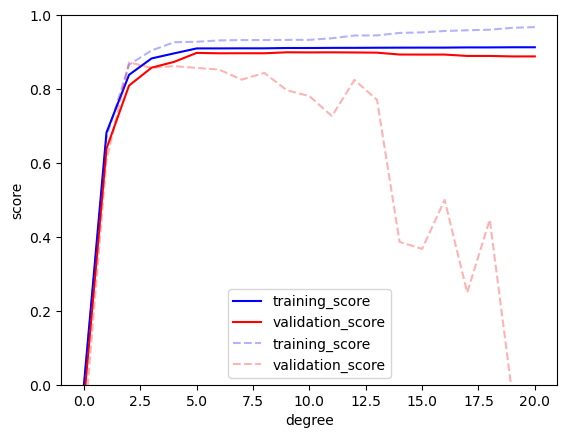

In [26]:
degree=np.arange(21)
train_score2,val_score2 = validation_curve(PolynomialRegression(),X2,y2, param_name='polynomialfeatures__degree',param_range=degree,cv=7)
plt.plot(degree,np.median(train_score2,1),color='blue',label='training_score')
plt.plot(degree,np.median(val_score2,1),color='red',label='validation_score')
plt.plot(degree,np.median(train_score,1),color='blue',label='training_score',alpha=0.3,linestyle='dashed')
plt.plot(degree,np.median(val_score,1),color='red',label='validation_score',alpha=0.3,linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score')

In [28]:
#Naive Bayes For Text Classification
from sklearn.datasets import fetch_20newsgroups
data= fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [30]:
#Subest data
categories=['talk.religion.misc','soc.religion.christian','sci.space']

In [32]:
train = fetch_20newsgroups(subset='train',categories=categories)
test = fetch_20newsgroups(subset='test',categories=categories)

In [36]:
print(train.data[5][48:])

r)
Subject: Re: Why not give $1 billion to first year-long moon residents?
Organization: University of Southern California, Los Angeles, CA
Lines: 29
Distribution: world
NNTP-Posting-Host: sal-sun121.usc.edu


In article <1993Apr19.130503.1@aurora.alaska.edu>, nsmca@aurora.alaska.edu writes:
|> In article <6ZV82B2w165w@theporch.raider.net>, gene@theporch.raider.net (Gene Wright) writes:
|> > With the continuin talk about the "End of the Space Age" and complaints 
|> > by government over the large cost, why not try something I read about 
|> > that might just work.
|> > 
|> > Announce that a reward of $1 billion would go to the first corporation 
|> > who successfully keeps at least 1 person alive on the moon for a year. 
|> > Then you'd see some of the inexpensive but not popular technologies begin 
|> > to be developed. THere'd be a different kind of space race then!
|> > 
|> > --
|> >   gene@theporch.raider.net (Gene Wright)
|> > theporch.raider.net  615/297-7951 The MacInteresteds o

In [44]:
#Extract features
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(CountVectorizer(),MultinomialNB())
model.fit(train.data,train.target)
labels= model.predict(test.data)

Text(113.92222222222219, 0.5, 'predicted label')

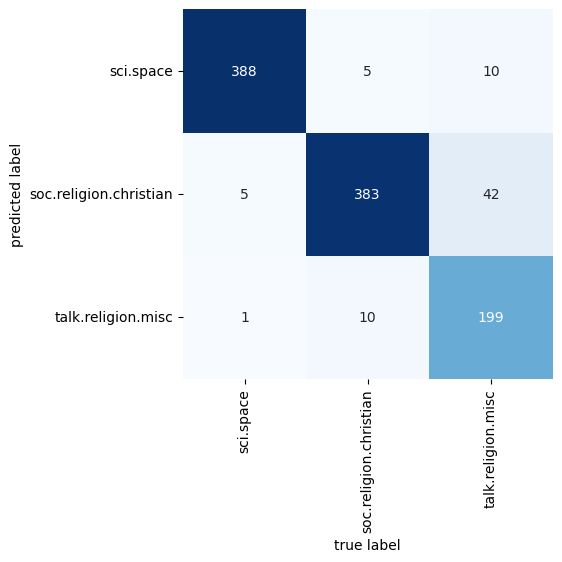

In [46]:
from sklearn.metrics import confusion_matrix
mat= confusion_matrix(test.target,labels)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=train.target_names,yticklabels=train.target_names,cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label')

In [52]:
def predict_category(s,train=train,model=model):
    pred=model.predict([s])
    return train.target_names[pred[0]]

In [54]:
predict_category('sending a payload to the ISS')

'sci.space'

In [56]:
#Gaussian Basis Functions
from sklearn.base import BaseEstimator,TransformerMixin

In [78]:
class GaussianFeatures(BaseEstimator,TransformerMixin):
    """Uniformly spaced Gaussian Features for one-dimensional input"""
    def __init__(self,N,width_factor=2.0):
        self.N=N
        self.width_factor=width_factor
    @staticmethod
    def _gauss_basis(x,y,width,axis=None):
        arg= (x-y)/width
        return np.exp(-0.5*np.sum(arg**2,axis))
    def fit(self,X,y=None):
        #create N centers spread along the data range
        self.centers_ = np.linspace(X.min(),X.max(),self.N)
        self.width_  = self.width_factor*(self.centers_[1] - self.centers_[0])
        return self

    def transform(self,X):
        return self._gauss_basis(X[:,:,np.newaxis],self.centers_,self.width_,axis=1)

In [72]:
#Create synthetic data
rng=np.random.RandomState(135)
x=10*rng.rand(50)
y =  np.sin(x) + 0.1* rng.randn(50)

In [86]:
xfit =  np.linspace(0,10,1000)

In [80]:
gauss_model = make_pipeline(GaussianFeatures(20),LinearRegression())

In [82]:
gauss_model.fit(x[:,np.newaxis],y)

Pipeline(steps=[('gaussianfeatures', GaussianFeatures(N=20)),
                ('linearregression', LinearRegression())])

In [88]:
yfit = gauss_model.predict(xfit[:,np.newaxis])

(0.0, 10.0)

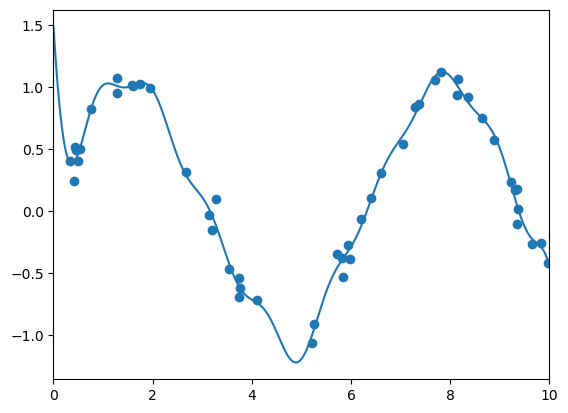

In [90]:
plt.scatter(x,y)
plt.plot(xfit,yfit)
plt.xlim(0,10)

In [92]:
#Spectral K-Means
from sklearn.datasets import make_moons
X,y=make_moons(200,noise=0.05,random_state=135)

In [94]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2,affinity='nearest_neighbors', assign_labels='kmeans')

C:\Users\MarkM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


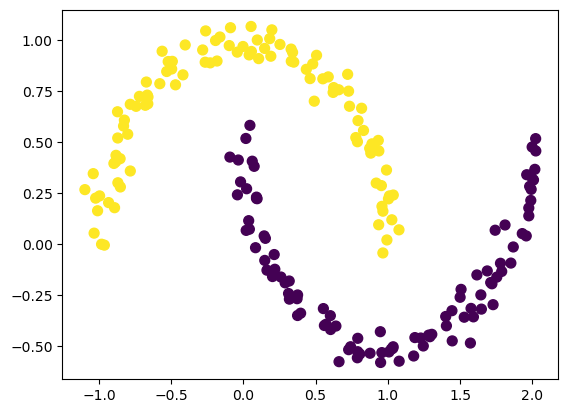

In [96]:
labels= model.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis')

In [102]:
#Load  data
from sklearn.datasets import load_digits
digits = load_digits()

In [104]:
#t-SNE and K-Means
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,init='random',learning_rate='auto',random_state=135)
digits_proj = tsne.fit_transform(digits.data)

In [110]:
#Compute the clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10,random_state=135)
clusters = kmeans.fit_predict(digits_proj)

In [118]:
#Permute the labels
from scipy.stats import mode
labels= np.zeros_like(clusters)
for i in range(10):
    mask= (clusters==i)
    labels[mask]= mode(digits.target[mask])[0]

In [126]:
#Compute the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(digits.target,labels)

0.9410127991096272

In [1]:
#Gaussian Mixtures Models
from sklearn.datasets import make_blobs
X,y_true = make_blobs(n_samples=400,centers=4,cluster_std=0.6,random_state=135)
X=X[:,::-1]#flip axis for better plotting

C:\Users\MarkM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


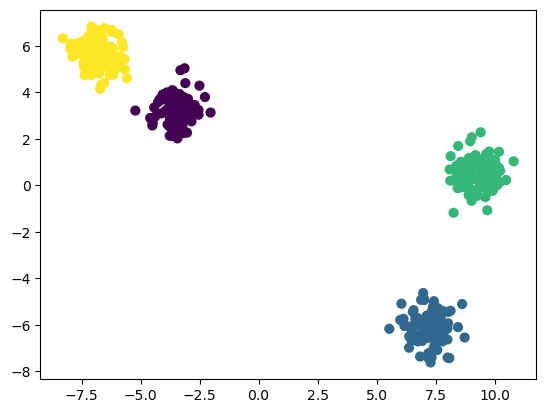

In [9]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:,0],X[:,1],c=labels,s=40,cmap='viridis')

In [33]:
rng=np.random.RandomState(135)
X_stretched= np.dot(X,rng.randn(2,2))

In [11]:
probs= gmm.predict_proba(X)
print(probs[:5].round(2))

[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


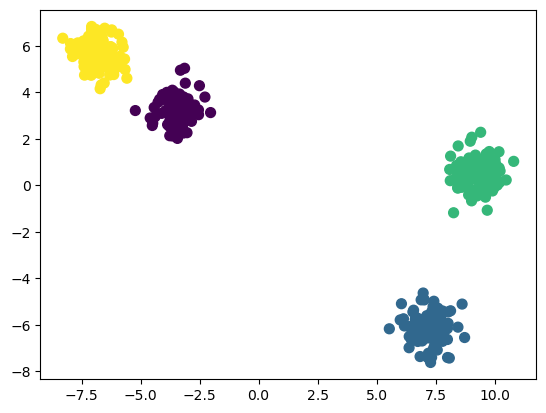

In [15]:
size=50*probs.max(1)**2 #square to emphasise differences
plt.scatter(X[:,0],X[:,1],c=labels,cmap='viridis',s=size)

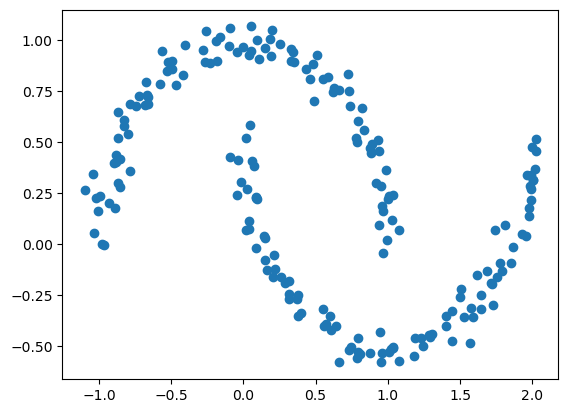

In [17]:
from sklearn.datasets import make_moons
Xmoon,ymoon=  make_moons(200,noise=0.05,random_state=135)
plt.scatter(Xmoon[:,0],Xmoon[:,1])

In [51]:
from matplotlib.patches import Ellipse
def draw_ellipse(position,covariance,ax=None,**kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax=ax or plt.gca()

    #Convert covariance to principal axes
    if covariance.shape ==(2,2):
        U,s,Vt= np.linalg.svd(covariance)
        angle=  np.degrees(np.arctan2(U[1,0],U[0,0]))
        width,height = 2 * np.sqrt(s)
    else:
        angle=0
        width,height = 2* np.sqrt(covariance)

    #Draw the ellipse
    for nsig in range(1,4):
        ax.add_patch(Ellipse(position,nsig*width,nsig*height,angle,**kwargs))

In [21]:
def plot_gmm(gmm,X,label=True,ax=None):
    ax =ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:,0],X[:,1],c=labels,s=40,cmap='viridis',zorder=2)
    else:
        ax.scatter(X[:,0],X[:,1],c=labels,s=40,cmap='viridis',zorder=2)
    ax.axis('equal')
    w_factor=0.2/gmm.weights_.max()
    for pos,covar,w in zip(gmm.means_,gmm.covariances_,gmm.weights_):
        draw_ellipse(pos,covar,alpha=w*w_factor)

C:\Users\MarkM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


TypeError: Ellipse.__init__() takes 4 positional arguments but 5 were given

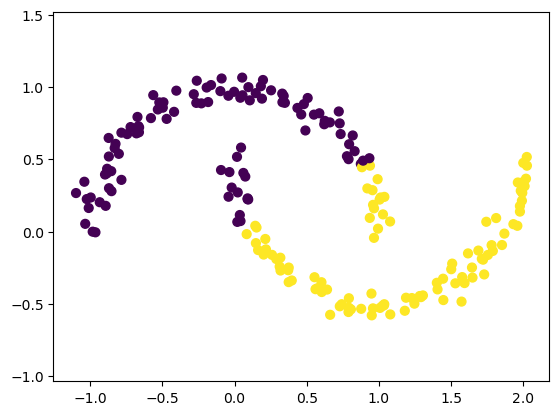

In [57]:
#Fit two component GMM
gmm2 = GaussianMixture(n_components=2,covariance_type='full',random_state=135)
plot_gmm(gmm2,Xmoon)

In [59]:
#Model selection based on AIC and BIC
n_components= np.arange(1,21)
models = [GaussianMixture(n,covariance_type='full',random_state=135).fit(Xmoon) for n in n_components]

C:\Users\MarkM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MarkM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MarkM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MarkM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

Text(0.5, 0, 'n_components')

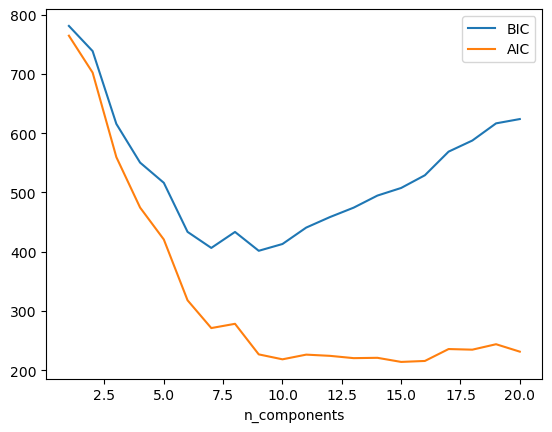

In [61]:
plt.plot(n_components,[m.bic(Xmoon) for m in models], label='BIC')
plt.plot(n_components,[m.aic(Xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')